# Week 12-1 Gradient Descent - MiniBatch GD
#### Machine Learning with Python by idebtor@gmail.com

-----------------------------------

## 1. 미니 배치 경사하강법

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import joy
%matplotlib inline

In [10]:
#%%writefile code/MnistMiniBatch.py
#%load code/MnistMiniBatch.py
class MnistMiniBatch(object):
    """ Mini-batch Gradient Descent
    """
    def __init__(self, n_x, n_h, n_y, eta = 0.1, epochs = 100, batch_size = 32, random_seed=1):
        """ 
        """
        self.n_x = n_x
        self.n_h = n_h
        self.n_y = n_y
        self.eta = eta
        self.epochs = epochs
        self.batch_size = batch_size
        np.random.seed(random_seed)
        self.W1 = 2*np.random.random((self.n_h, self.n_x)) - 1  # between -1 and 1
        self.W2 = 2*np.random.random((self.n_y, self.n_h)) - 1  # between -1 and 1
        #print('W1.shape={}, W2.shape={}'.format(self.W1.shape, self.W2.shape))
        
    def forpass(self, A0):
        Z1 = np.dot(self.W1, A0)          # hidden layer inputs
        A1 = self.g(Z1)                      # hidden layer outputs/activation func
        Z2 = np.dot(self.W2, A1)          # output layer inputs
        A2 = self.g(Z2)                       # output layer outputs/activation func
        return Z1, A1, Z2, A2

    def fit(self, X, y):
        """ 
        X: input dataset 
        y: class labels
        """

        self.cost_ = []
        m_samples = len(y)       
        Y = joy.one_hot_encoding(y, self.n_y)       # (m, n_y) = (m, 10)   one-hot encoding
        #print('X.shape={}, y.shape={}, Y.shape={}'.format(X.shape, y.shape, Y.shape))
        
        for epoch in range(self.epochs):
            #print('Training epoch {}/{}.'.format(epoch + 1, self.epochs))
            for i in range(0, m_samples, self.batch_size):
                A0 = X[i: i + self.batch_size]
                Y0 = Y[i: i + self.batch_size]
                
                A0 = np.array(A0, ndmin=2).T
                Y0 = np.array(Y0, ndmin=2).T

                Z1, A1, Z2, A2 = self.forpass(A0)        

                E2 = Y0 - A2                 
                E1 = np.dot(self.W2.T, E2)       

                # back prop, error prop
                dZ2 = E2 * self.g_prime(Z2)     
                dZ1 = E1 * self.g_prime(Z1)    

                # update weights
                self.W2 +=  self.eta * np.dot(dZ2, A1.T)     
                self.W1 +=  self.eta * np.dot(dZ1, A0.T)    

                self.cost_.append(np.sqrt(np.sum(E2 * E2)
                                          /self.batch_size))
        return self

    def predict(self, X):
        A0 = np.array(X, ndmin=2).T         # A0: inputs
        Z1, A1, Z2, A2 = self.forpass(A0)   # forpass
        return A2                                       

    def g(self, x):                             # activation_function: sigmoid
        return 1.0/(1.0+np.exp(-x))
    
    def g_prime(self, x):                    # activation_function: sigmoid derivative
        return self.g(x) * (1 - self.g(x))
    
    def evaluate(self, Xtest, ytest):       
        m_samples = len(ytest)
        scores = 0        
        A2 = self.predict(Xtest)
        yhat = np.argmax(A2, axis = 0)
        scores += np.sum(yhat == ytest)
        return scores/m_samples * 100

## 2. 학습결과

In [11]:
import joy
(X, y), (Xtest, ytest) = joy.load_mnist()
nn = MnistMiniBatch(784, 100, 10, epochs = 20, batch_size = 32)
nn.fit(X[:1000], y[:1000])
accuracy = nn.evaluate(Xtest[:100], ytest[:100])
print('Accuracy {}%'.format(accuracy))

Accuracy 87.0%


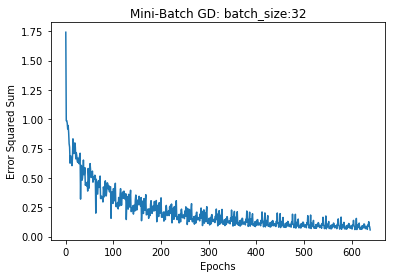

In [12]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.xlabel('Epochs')
plt.ylabel('Error Squared Sum')
plt.title('Mini-Batch GD: batch_size:{}'.format(nn.batch_size))
plt.show()

## 3.1 과대적합: 원인 - 반복횟수

In [13]:
(X, y), (Xtest, ytest) = joy.load_mnist()
epoch_list = [i for i in np.arange(1, 31, 2)] + [i for i in np.arange(40, 101, 20)]
print('epoch_list =', epoch_list)
self_accuracy = []
test_accuracy = []
for i, e in enumerate(epoch_list):
    print("i = {}/{}, epoch = {}".format(i+1, len(epoch_list), e))
    nn = MnistMiniBatch(784, 100, 10, epochs = e, batch_size = 32)
    nn.fit(X, y)
    self_accuracy.append(nn.evaluate(X, y))
    test_accuracy.append(nn.evaluate(Xtest, ytest))

epoch_list = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 40, 60, 80, 100]
i = 1/19, epoch = 1
i = 2/19, epoch = 3
i = 3/19, epoch = 5
i = 4/19, epoch = 7
i = 5/19, epoch = 9
i = 6/19, epoch = 11
i = 7/19, epoch = 13
i = 8/19, epoch = 15
i = 9/19, epoch = 17
i = 10/19, epoch = 19
i = 11/19, epoch = 21
i = 12/19, epoch = 23
i = 13/19, epoch = 25
i = 14/19, epoch = 27
i = 15/19, epoch = 29
i = 16/19, epoch = 40
i = 17/19, epoch = 60
i = 18/19, epoch = 80
i = 19/19, epoch = 100


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.plot(epoch_list, self_accuracy, label='self')
plt.plot(epoch_list, test_accuracy, label='test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Overfitting:Higher Epochs'.format(nn.batch_size))
plt.legend(loc='center')
plt.show()

NameError: name 'epoch_list' is not defined

## 3.2 은닉층 노드의 수

In [ ]:
(X, y), (Xtest, ytest) = joy.load_mnist() 
n_h_list = np.linspace(50, 800, 16, dtype=int)
print('n_h_list =', n_h_list) 
self_accuracy = []
test_accuracy = []
for i, n_h in  enumerate(n_h_list):
    print("i = {}/{}, hidden_nodes = {}".format(i+1, len(n_h_list), n_h))
    nn = MnistMiniBatch(784, n_h, 10, epochs = 10, batch_size = 32)  
    nn.fit(X, y)  
    self_accuracy.append(nn.evaluate(X, y))  
    test_accuracy.append(nn.evaluate(Xtest, ytest))

n_h_list = [ 50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800]
i = 1/16, hidden_nodes = 50
i = 2/16, hidden_nodes = 100
i = 3/16, hidden_nodes = 150
i = 4/16, hidden_nodes = 200
i = 5/16, hidden_nodes = 250
i = 6/16, hidden_nodes = 300
i = 7/16, hidden_nodes = 350
i = 8/16, hidden_nodes = 400
i = 9/16, hidden_nodes = 450
i = 10/16, hidden_nodes = 500
i = 11/16, hidden_nodes = 550
i = 12/16, hidden_nodes = 600
i = 13/16, hidden_nodes = 650
i = 14/16, hidden_nodes = 700
i = 15/16, hidden_nodes = 750
i = 16/16, hidden_nodes = 800


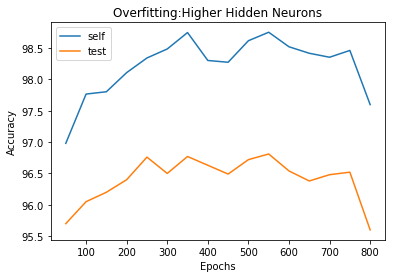

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.plot(n_h_list, self_accuracy, label='self')
plt.plot(n_h_list, test_accuracy, label='test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Overfitting:Higher Hidden Neurons'.format(nn.batch_size))
plt.legend(loc='best')
plt.show()

## 3.3 해결방법 - 조기종료

In [4]:
import joy
(X, y), (Xtest, ytest) = joy.load_mnist()

trainlist = []
testlist = []
w1 = []
w2 = []
for hl in range(40, 810, 10):
    nn = MnistMiniBatch(784, hl, 10, epochs = 20, batch_size = 32)
    nn.fit(X[:1000], y[:1000])
    trainning = nn.evaluate(X[:1000], y[:1000])
    test = nn.evaluate(Xtest[:1000], ytest[:1000])
    
    trainlist.append(round(trainning, 2))
    testlist.append(round(test, 2))
    w1.append(nn.W1)
    w2.append(nn.W2)

## 3.4 데이터 증식

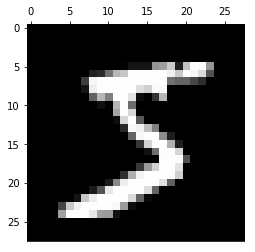

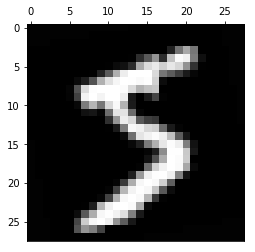

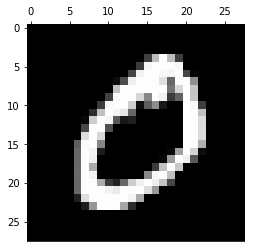

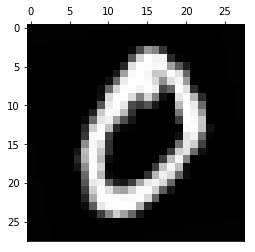

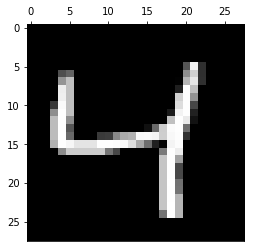

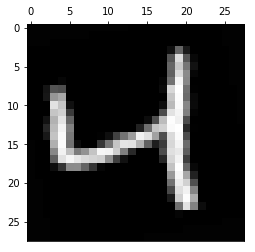

In [8]:
import joy
import scipy
(X, y), (Xtest, ytest) = joy.load_mnist()
for idx in range(0, 3):
    Xr = X[idx].reshape(28, 28)
    joy.show_mnist(Xr)
    Xr = scipy.ndimage.rotate(Xr, 12.0, cval = 0.01, order = 1, reshape = False)
    joy.show_mnist(Xr)

## 3.5 드롭아웃(Dropout)

### MnistMiniBatchGD

In [14]:
#%%writefile code/MnistMiniBatch.py
#%load code/MnistMiniBatch.py
class MnistMiniBatchGD(object):
    """ Mini-batch Gradient Descent
    """
    def __init__(self, n_x, n_h, n_y, eta = 0.1, epochs = 100, batch_size = 32, random_seed=1):
        """ 
        """
        self.n_x = n_x
        self.n_h = n_h
        self.n_y = n_y
        self.eta = eta
        self.epochs = epochs
        self.batch_size = batch_size
        np.random.seed(random_seed)
        self.W1 = 2*np.random.random((self.n_h, self.n_x)) - 1  # between -1 and 1
        self.W2 = 2*np.random.random((self.n_y, self.n_h)) - 1  # between -1 and 1
        #print('W1.shape={}, W2.shape={}'.format(self.W1.shape, self.W2.shape))
        
    def forpass(self, A0, train=True):
        Z1 = np.dot(self.W1, A0)          # hidden layer inputs
        A1 = self.g(Z1)                      # hidden layer outputs/activation func
           
        Z2 = np.dot(self.W2, A1)          # output layer inputs
        A2 = self.g(Z2)                       # output layer outputs/activation func
        return Z1, A1, Z2, A2

    def fit(self, X, y):
        """ 
        X: input dataset 
        y: class labels
        """

        self.cost_ = []
        m_samples = len(y)       
        Y = joy.one_hot_encoding(y, self.n_y)       # (m, n_y) = (m, 10)   one-hot encoding
        #print('X.shape={}, y.shape={}, Y.shape={}'.format(X.shape, y.shape, Y.shape))
        
        for epoch in range(self.epochs):
            #print('Training epoch {}/{}.'.format(epoch + 1, self.epochs))
            for i in range(0, m_samples, self.batch_size):
                A0 = X[i: i + self.batch_size]
                Y0 = Y[i: i + self.batch_size]
                
                A0 = np.array(A0, ndmin=2).T
                Y0 = np.array(Y0, ndmin=2).T

                Z1, A1, Z2, A2 = self.forpass(A0)        

                E2 = Y0 - A2                 
                E1 = np.dot(self.W2.T, E2)       

                # back prop, error prop
                dZ2 = E2 * self.g_prime(Z2)     
                dZ1 = E1 * self.g_prime(Z1)    
                
                # update weights
                self.W2 +=  self.eta * np.dot(dZ2, A1.T)     
                self.W1 +=  self.eta * np.dot(dZ1, A0.T)    

                self.cost_.append(np.sqrt(np.sum(E2 * E2)
                                          /self.batch_size))
        return self

    def predict(self, X):
        A0 = np.array(X, ndmin=2).T         # A0: inputs
        Z1, A1, Z2, A2 = self.forpass(A0, train=False)   # forpass
        return A2                                       

    def g(self, x):                             # activation_function: sigmoid
        return 1.0/(1.0+np.exp(-x))
    
    def g_prime(self, x):                    # activation_function: sigmoid derivative
        return self.g(x) * (1 - self.g(x))
    
    def evaluate(self, Xtest, ytest):       
        m_samples = len(ytest)
        scores = 0        
        A2 = self.predict(Xtest)
        yhat = np.argmax(A2, axis = 0)
        scores += np.sum(yhat == ytest)
        return scores/m_samples * 100

In [15]:
import joy
(X, y), (Xtest, ytest) = joy.load_mnist()
nn = MnistMiniBatchGD(784, 600, 10, epochs = 40)
nn.fit(X[:3000], y[:3000])
self = nn.evaluate(X[:3000], y[:3000])
test = nn.evaluate(Xtest[:1000], ytest[:1000])
print('MNIST self accuracy {}%'.format(self))
print('MNIST test accuracy {}%'.format(test))

MNIST self accuracy 100.0%
MNIST test accuracy 89.3%


### MnistMiniBatchGD with Dropout

In [16]:
#%%writefile code/MnistMiniBatch.py
#%load code/MnistMiniBatch.py
class MnistMiniBatchGD_Dropout(object):
    """ Mini-batch Gradient Descent with Dropout
    """
    def __init__(self, n_x, n_h, n_y, eta = 0.1, epochs = 100, batch_size = 32, random_seed=1, dropout_ratio=0.5):
        """ 
        """
        self.n_x = n_x
        self.n_h = n_h
        self.n_y = n_y
        self.eta = eta
        self.epochs = epochs
        self.batch_size = batch_size
        np.random.seed(random_seed)
        self.dropout_ratio = dropout_ratio
        self.W1 = 2*np.random.random((self.n_h, self.n_x)) - 1  # between -1 and 1
        self.W2 = 2*np.random.random((self.n_y, self.n_h)) - 1  # between -1 and 1
        #print('W1.shape={}, W2.shape={}'.format(self.W1.shape, self.W2.shape))
        
    def forpass(self, A0, train=True):
        Z1 = np.dot(self.W1, A0)                # hidden layer inputs
        A1 = self.g(Z1)                         # hidden layer outputs/activation func

        # Dropout
        if train:
            self.drop_units = np.random.rand(*A1.shape) > self.dropout_ratio
            A1 = A1 * self.drop_units / self.dropout_ratio
          
        Z2 = np.dot(self.W2, A1)                # output layer inputs
        A2 = self.g(Z2)                         # output layer outputs/activation func
        return Z1, A1, Z2, A2

    def fit(self, X, y):
        """ 
        X: input dataset 
        y: class labels
        """

        self.cost_ = []
        m_samples = len(y)       
        Y = joy.one_hot_encoding(y, self.n_y)       # (m, n_y) = (m, 10)   one-hot encoding
        #print('X.shape={}, y.shape={}, Y.shape={}'.format(X.shape, y.shape, Y.shape))
        
        for epoch in range(self.epochs):
            #print('Training epoch {}/{}.'.format(epoch + 1, self.epochs))
            for i in range(0, m_samples, self.batch_size):
                A0 = X[i: i + self.batch_size].T
                Y0 = Y[i: i + self.batch_size].T
                Z1, A1, Z2, A2 = self.forpass(A0)        

                E2 = Y0 - A2                 
                E1 = np.dot(self.W2.T, E2)       

                # back prop, error prop
                dZ2 = E2 * self.g_prime(Z2)     
                dZ1 = E1 * self.g_prime(Z1)    

                # Dropout
                dZ1 = dZ1 * self.drop_units       

                # update weights
                self.W2 +=  self.eta * np.dot(dZ2, A1.T)     
                self.W1 +=  self.eta * np.dot(dZ1, A0.T)    

                self.cost_.append(np.sqrt(np.sum(E2 * E2)
                                          /self.batch_size))
        return self

    def predict(self, X):
        A0 = np.array(X, ndmin=2).T         # A0: inputs
        Z1, A1, Z2, A2 = self.forpass(A0, train=False)   # forpass
        return A2                                       

    def g(self, x):                             # activation_function: sigmoid
        return 1.0/(1.0+np.exp(-x))
    
    def g_prime(self, x):                    # activation_function: sigmoid derivative
        return self.g(x) * (1 - self.g(x))
    
    def evaluate(self, Xtest, ytest):       
        m_samples = len(ytest)
        scores = 0        
        A2 = self.predict(Xtest)
        yhat = np.argmax(A2, axis = 0)
        scores += np.sum(yhat == ytest)
        return scores/m_samples * 100

In [17]:
import joy
(X, y), (Xtest, ytest) = joy.load_mnist()
nn = MnistMiniBatchGD_Dropout(784, 600, 10, 
            epochs = 40, dropout_ratio = 0.5)
nn.fit(X[:3000], y[:3000])
self = nn.evaluate(X[:3000], y[:3000])
test = nn.evaluate(Xtest[:1000], ytest[:1000])
print('MNIST self accuracy {}%'.format(self))
print('MNIST test accuracy {}%'.format(test))

MNIST self accuracy 99.73333333333333%
MNIST test accuracy 91.7%


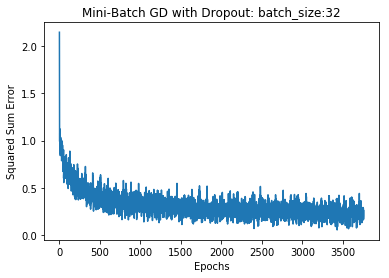

In [18]:
import matplotlib.pyplot as plt

plt.plot(range(len(nn.cost_)), nn.cost_)
plt.xlabel('Epochs')
plt.ylabel('Squared Sum Error')
plt.title('Mini-Batch GD with Dropout: batch_size:{}'.format(nn.batch_size))
plt.show()

----------
_In the beginning God created the heavens and the earth. Genesis1:1_